___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [53]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# yellowbrick library
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# sklearn library
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans
from pyclustertend import hopkins
from sklearn.preprocessing import StandardScaler

plt.rcParams['figure.figsize']=(12,6)
plt.rcParams.update({'font.size': 22})
sns.set_style("whitegrid", {'axes.grid' : False})

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# # to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

#### Load Dataset

In [54]:
df_origin = pd.read_csv("./Mall_Customers.csv")
df_origin.drop(columns=["CustomerID"],inplace=True)
df = df_origin.copy()
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





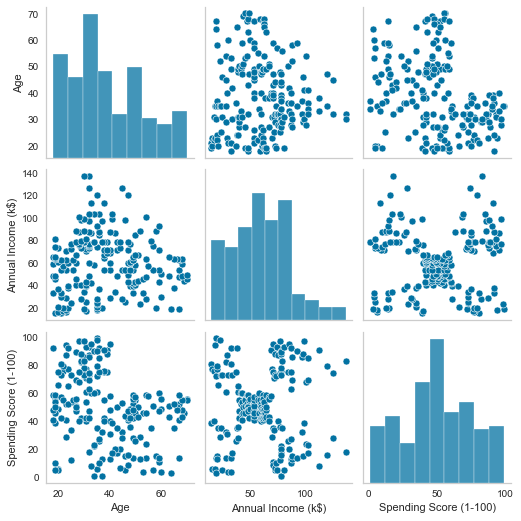

In [56]:
sns.pairplot(df)

In [57]:
df.duplicated().any()

False

In [58]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [59]:
df['Gender'].astype("category").cat.codes

0      1
1      1
2      0
3      0
4      0
5      0
6      0
7      0
8      1
9      0
10     1
11     0
12     0
13     0
14     1
15     1
16     0
17     1
18     1
19     0
20     1
21     1
22     0
23     1
24     0
25     1
26     0
27     1
28     0
29     0
30     1
31     0
32     1
33     1
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     1
42     1
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     1
52     0
53     1
54     0
55     1
56     0
57     1
58     0
59     1
60     1
61     1
62     0
63     0
64     1
65     1
66     0
67     0
68     1
69     0
70     1
71     0
72     0
73     0
74     1
75     1
76     0
77     1
78     0
79     0
80     1
81     1
82     1
83     0
84     0
85     1
86     0
87     0
88     0
89     0
90     0
91     1
92     1
93     0
94     0
95     1
96     0
97     0
98     1
99     1
100    0
101    0
102    1
103    1
104    1
105    0
106    0
107    1
108    1
109    1
110    1
1

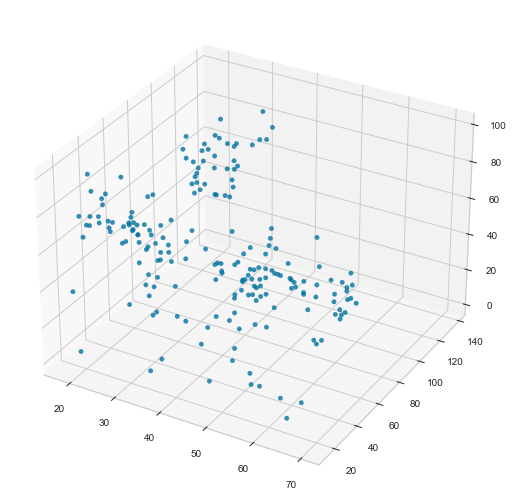

In [60]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
# Creating color map
my_cmap = plt.get_cmap('hsv')
# Creating plot
sctt = ax.scatter3D(df["Age"], df["Annual Income (k$)"], df['Spending Score (1-100)'],alpha = 0.8)

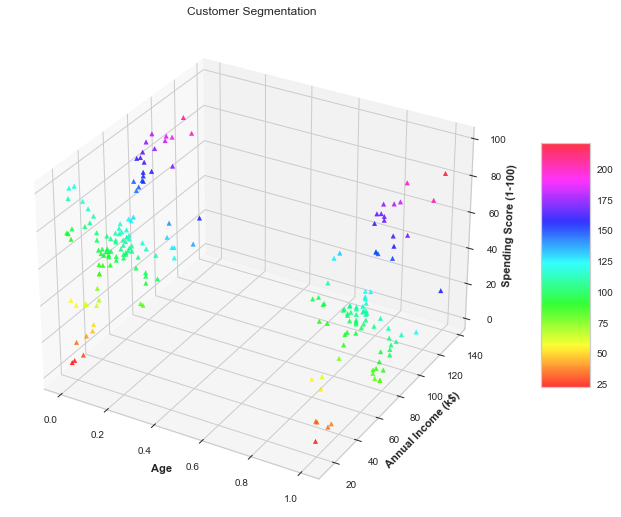

In [61]:
from mpl_toolkits import mplot3d
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
# Creating color map
my_cmap = plt.get_cmap('hsv')
# Creating plot
sctt = ax.scatter3D(df['Gender'].astype("category").cat.codes, df["Annual Income (k$)"], df['Spending Score (1-100)'],
                    alpha = 0.8,
                    c = (df['Gender'].astype("category").cat.codes + df["Annual Income (k$)"] + df['Spending Score (1-100)']),
                    cmap = my_cmap,
                    marker ='^')
plt.title("Customer Segmentation")
ax.set_xlabel('Age', fontweight ='bold')
ax.set_ylabel('Annual Income (k$)', fontweight ='bold')
ax.set_zlabel('Spending Score (1-100)', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)

plt.show()


In [62]:
df.groupby("Gender").describe().T

Gender                        Female   Male
Age                    count  112.00  88.00
                       mean    38.10  39.81
                       std     12.64  15.51
                       min     18.00  18.00
                       25%     29.00  27.75
                       50%     35.00  37.00
                       75%     47.50  50.50
                       max     68.00  70.00
Annual Income (k$)     count  112.00  88.00
                       mean    59.25  62.23
                       std     26.01  26.64
                       min     16.00  15.00
                       25%     39.75  45.50
                       50%     60.00  62.50
                       75%     77.25  78.00
                       max    126.00 137.00
Spending Score (1-100) count  112.00  88.00
                       mean    51.53  48.51
                       std     24.11  27.90
                       min      5.00   1.00
                       25%     35.00  24.50
                       50%     50.00  50.00
                       75%     73.00  70.00
                       max     99.00  97.00

<AxesSubplot:ylabel='Gender-None'>

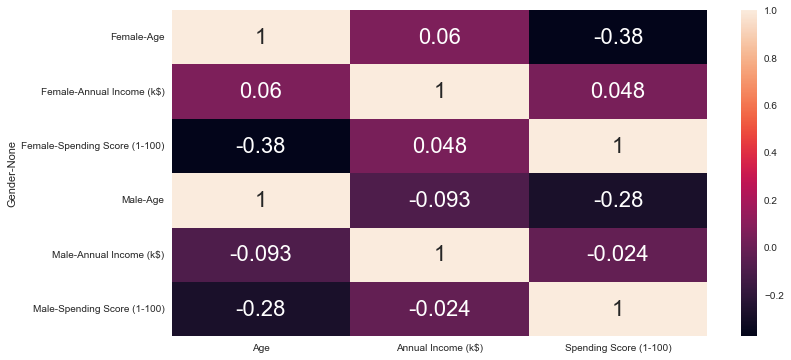

In [63]:
sns.heatmap(df.groupby("Gender").corr(),annot=True)

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [64]:
df["Gender"]=df["Gender"].map({"Male":1, "Female":0})

In [65]:
scaler = StandardScaler()
df[df.columns]=scaler.fit_transform(df)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.13,-1.42,-1.74,-0.43
1,1.13,-1.28,-1.74,1.20
2,-0.89,-1.35,-1.70,-1.72
3,-0.89,-1.14,-1.70,1.04
4,-0.89,-0.56,-1.66,-0.40


In [66]:
X = df[["Age","Spending Score (1-100)"]]
X.shape

(200, 2)

In [67]:
hopkins(X, X.shape[0])

0.30440113603072144

In [68]:
hopkins(X,X.shape[0]//2)

0.299263668505214

#### *ii. Determine optimal number of clusters*

In [69]:
K_means_model = KMeans(n_clusters=5, random_state=101)
K_means_model.fit(X)

KMeans(n_clusters=5, random_state=101)

In [70]:
pd.DataFrame(K_means_model.labels_).value_counts()

2    57
3    47
0    41
4    33
1    22
dtype: int64

In [71]:
ssd = [] #sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=101)
    model.fit(X)
    ssd.append(model.inertia_) # intertia: Distance from each sample to centroid of its cluster

In [72]:
ssd

[189.3874903399244,
 124.32628617921526,
 89.76521676586151,
 71.0936414145941,
 53.12843835629399,
 45.90710456567846,
 39.37097843198113,
 34.08386546925258]

Text(0.5, 1.0, 'elbow method')

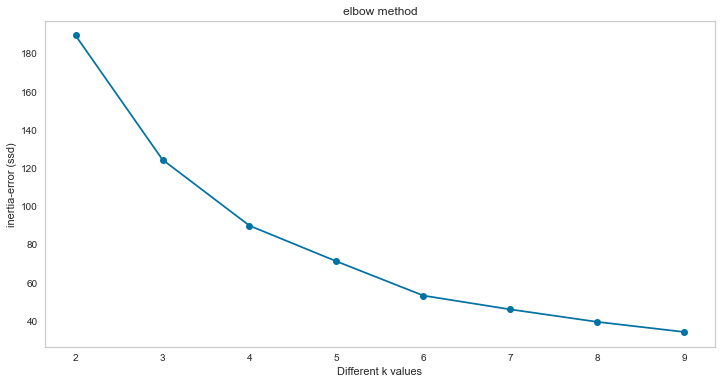

In [73]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method") 

In [74]:
pd.Series(ssd,index=K).diff(-1)

2   65.06
3   34.56
4   18.67
5   17.97
6    7.22
7    6.54
8    5.29
9     NaN
dtype: float64

In [75]:
df_diff =pd.DataFrame(pd.Series(ssd,index=K).diff(-1))
df_diff

,0
2,65.06
3,34.56
4,18.67
5,17.97
6,7.22
7,6.54
8,5.29
9,NaN


<AxesSubplot:>

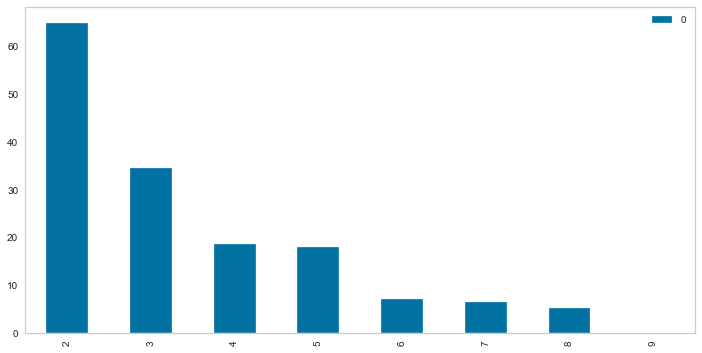

In [76]:
df_diff.plot(kind='bar')

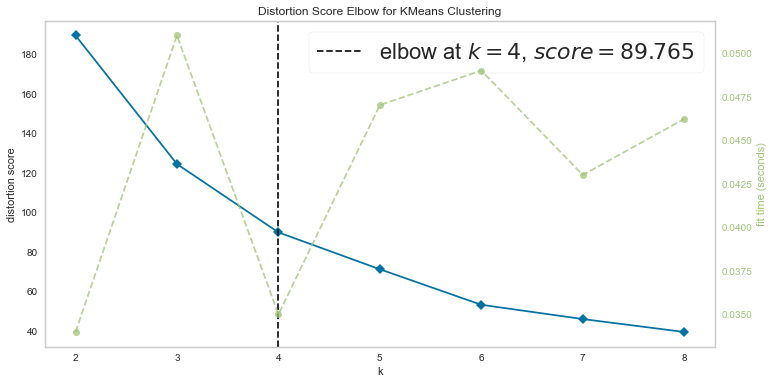

In [77]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=101)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

### Why silhouette_score is negative?

![image.png](attachment:image.png)

In [78]:
silhouette_score(X, K_means_model.labels_)

0.42369111306686563

In [79]:
K_means_model

KMeans(n_clusters=5, random_state=101)

In [80]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    model = KMeans(n_clusters=num_clusters, random_state=101)
    model.fit(X)
    cluster_labels = model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4721271643062346
For n_clusters=3, the silhouette score is 0.43952990002101927
For n_clusters=4, the silhouette score is 0.4383860846531993
For n_clusters=5, the silhouette score is 0.42369111306686563
For n_clusters=6, the silhouette score is 0.4566283030197353
For n_clusters=7, the silhouette score is 0.4114882432090666
For n_clusters=8, the silhouette score is 0.41807241036672366


#### *iii. Apply K Means*

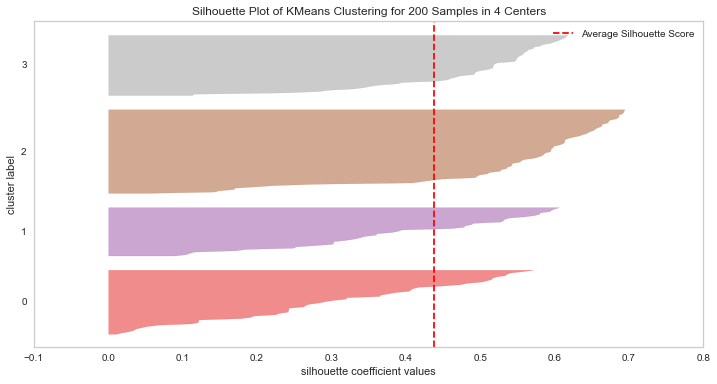

In [81]:
kmeans = KMeans(n_clusters=4, random_state=101)
visualizer = SilhouetteVisualizer(kmeans)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

#### *iv. Visualizing and Labeling All the Clusters*

In [82]:
centers = kmeans.cluster_centers_
pd.DataFrame(centers)

,0,1
0,-0.83,-0.39
1,0.63,-1.37
2,-0.61,1.15
3,1.23,-0.07


In [83]:
df["clusters"] = kmeans.labels_
df["clusters"].value_counts()

2    65
0    50
3    47
1    38
Name: clusters, dtype: int64

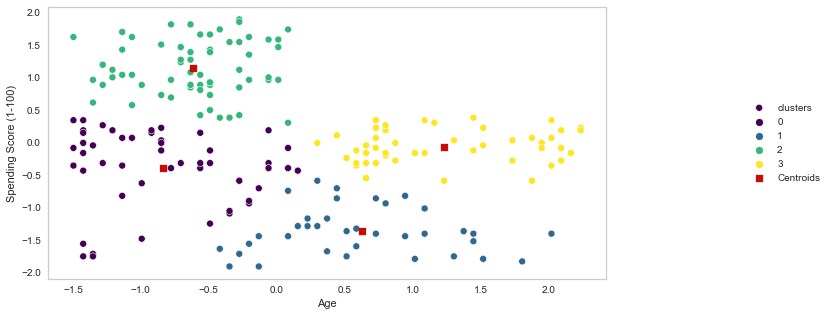

In [84]:
plt.figure(figsize=(10,5))

sns.scatterplot(
    x="Age", y="Spending Score (1-100)", 
    data=df, 
    hue= "clusters", 
    palette= "viridis", 
    label='clusters'
)
plt.scatter(centers[:,0], centers[:,1], marker='s', c="r", label='Centroids')
plt.legend(loc="center right", bbox_to_anchor=(1.4, 0.5))
plt.show();

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [85]:
X = df[["Annual Income (k$)","Spending Score (1-100)"]]
X.shape

(200, 2)

In [86]:
hopkins(X, X.shape[0])

0.31711146854704486

In [87]:
hopkins(X,X.shape[0]//2)

0.3087628481873018

#### *ii. Determine optimal number of clusters*

In [88]:
ssd = [] #sum squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=101)
    model.fit(X)
    ssd.append(model.inertia_) # intertia: Distance from each sample to centroid of its cluster
    
ssd

[270.1559035072792,
 157.70400815035939,
 108.92131661364358,
 65.56840815571681,
 55.11422576528422,
 44.91118554999014,
 37.19778691869562,
 32.5276156898172]

Text(0.5, 1.0, 'elbow method')

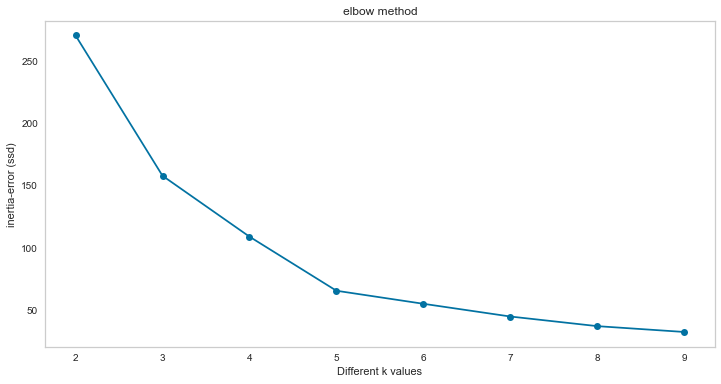

In [89]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error (ssd)") 
plt.title("elbow method") 

In [90]:
df_diff =pd.DataFrame(pd.Series(ssd,index=K).diff(-1))
df_diff

,0
2,112.45
3,48.78
4,43.35
5,10.45
6,10.20
7,7.71
8,4.67
9,NaN


<AxesSubplot:>

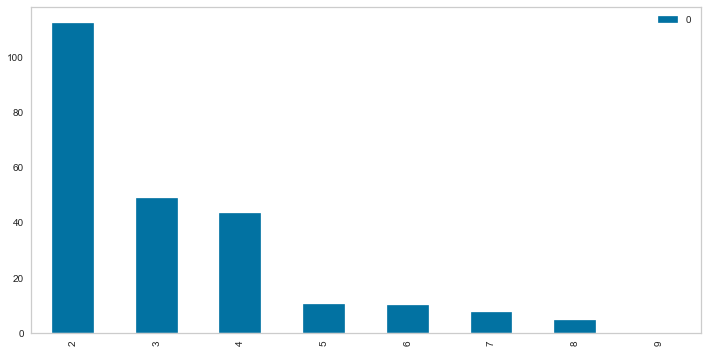

In [91]:
df_diff.plot(kind='bar')

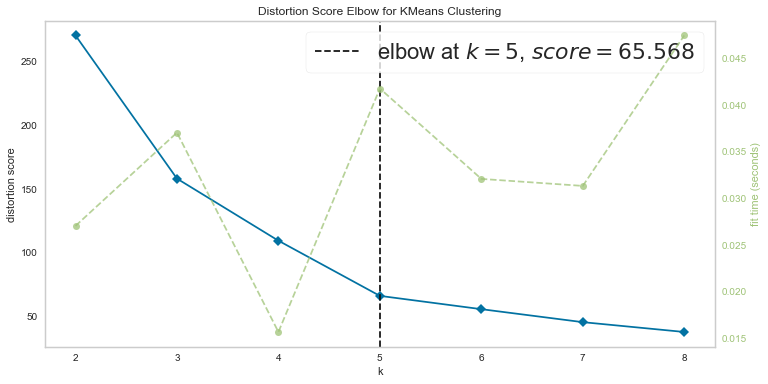

In [92]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=101)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

In [93]:
K_means_model = KMeans(n_clusters=5, random_state=101)
K_means_model.fit(X)
silhouette_score(X, K_means_model.labels_)

0.5546571631111091

In [94]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    model = KMeans(n_clusters=num_clusters, random_state=101)
    model.fit(X)
    cluster_labels = model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3093014040985521
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5377141165734254
For n_clusters=7, the silhouette score is 0.5263454490712252
For n_clusters=8, the silhouette score is 0.45543473014577757


#### *iii. Apply K Means*

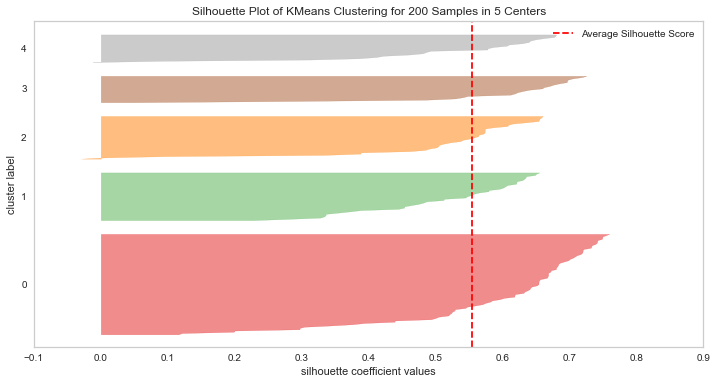

In [95]:
kmeans = KMeans(n_clusters=5, random_state=101)
visualizer = SilhouetteVisualizer(kmeans)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

In [96]:
kmeans = KMeans(n_clusters=5, random_state=101)
df["clusters"] = kmeans.fit_predict(X)

centers = kmeans.cluster_centers_
pd.DataFrame(centers)

,0,1
0,-0.20,-0.03
1,0.99,1.24
2,1.06,-1.28
3,-1.33,1.13
4,-1.31,-1.14


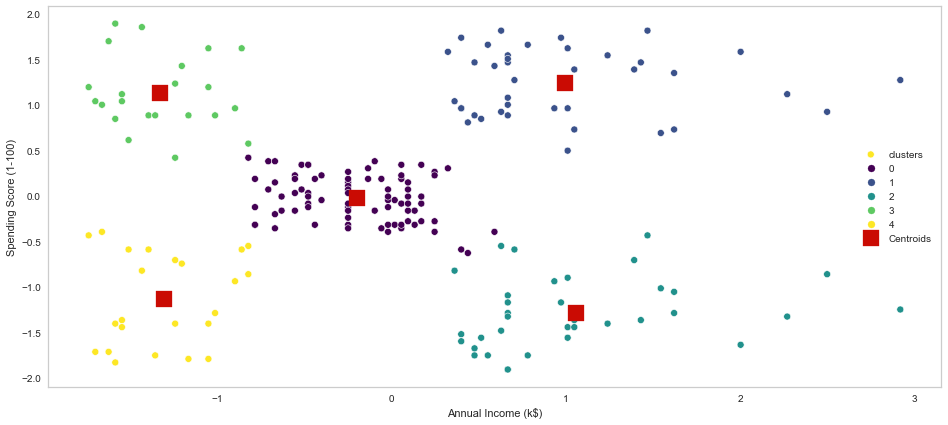

In [97]:
plt.figure(figsize=(16,7))
sns.scatterplot(
    x="Annual Income (k$)", y="Spending Score (1-100)", 
    data=df, 
    hue= "clusters", 
    palette= "viridis", 
    label='clusters'
)
plt.scatter(centers[:,0], centers[:,1], marker='s', c="r", label='Centroids',s=250)
plt.legend(loc="center right", bbox_to_anchor=(1, 0.5))
plt.show();

#### *iv. Visualizing and Labeling All the Clusters*

In [98]:
df["clusters"].value_counts()

0    81
1    39
2    35
4    23
3    22
Name: clusters, dtype: int64

In [99]:
df["clusters"]=df["clusters"].map({0 : "medium_income_medium_spent",
                    1 : "high_income_high_spent",
                    2 : "high_income_low_spent",
                    3 : "low_income_high_spent",
                    4 : "low_income_low_spent"})
df["clusters"].value_counts()

medium_income_medium_spent    81
high_income_high_spent        39
high_income_low_spent         35
low_income_low_spent          23
low_income_high_spent         22
Name: clusters, dtype: int64

### Hierarchical Clustering

In [101]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [102]:
X1 = df[["Age","Spending Score (1-100)"]]
X1.shape

(200, 2)

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

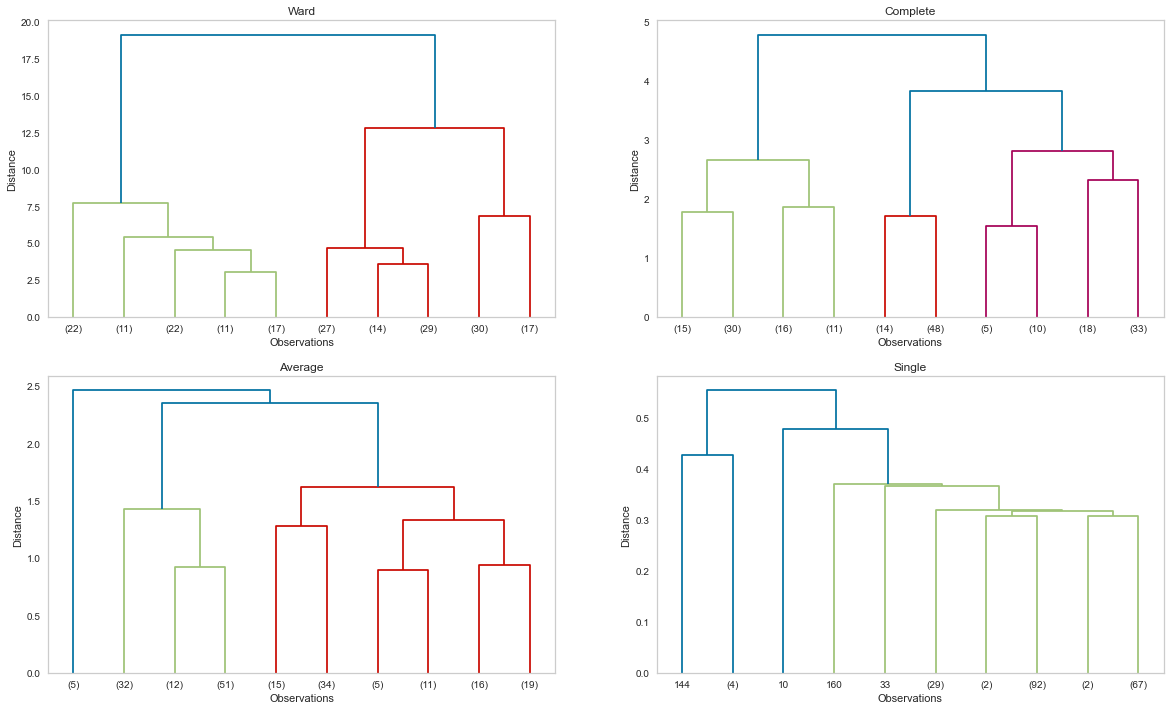

In [104]:
x=0
plt.figure(figsize = (20,12))
for i,j in enumerate(["ward","complete","average","single"]):
    plt.subplot(221+i)
    plt.title(j.title())
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(linkage(X1, j), leaf_font_size = 10, truncate_mode='lastp', p=10)
    x += 1

## Clustering based on Annual Income and Spending Score- x2

In [105]:
X2 = df[["Annual Income (k$)","Spending Score (1-100)"]]
X2.shape

(200, 2)

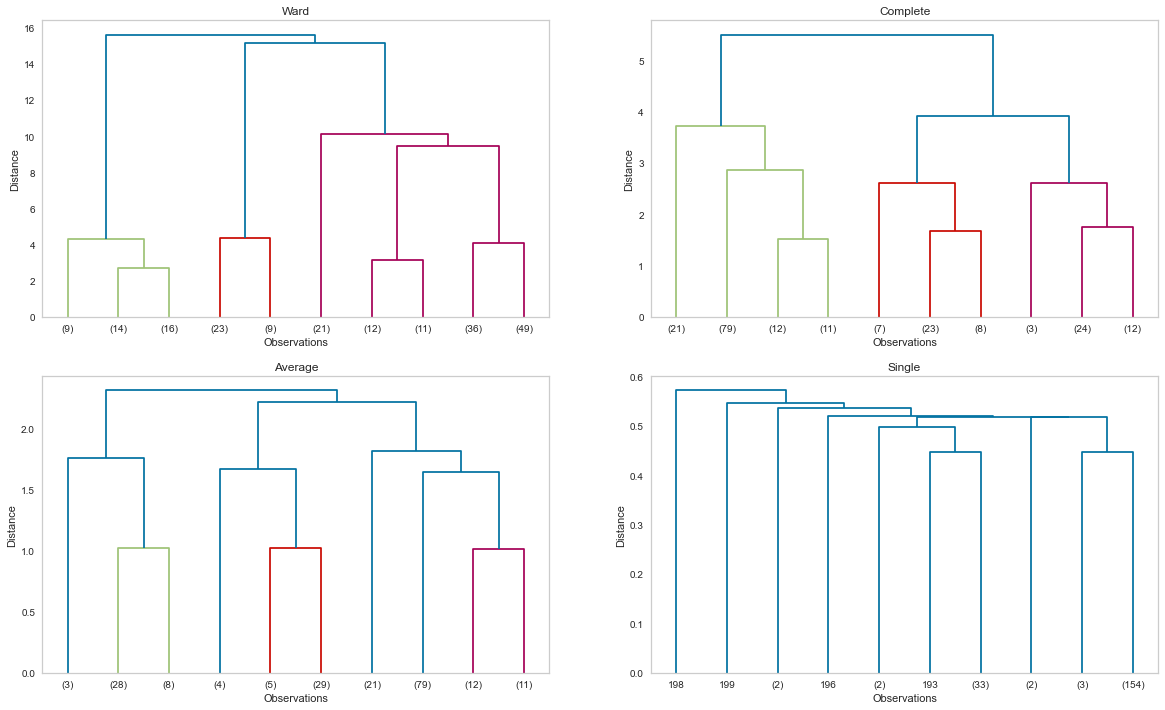

In [106]:
plt.figure(figsize = (20,12))
for i,j in enumerate(["ward","complete","average","single"]):
    plt.subplot(221+i)
    plt.title(j.title())
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(linkage(X2, j), leaf_font_size = 10, truncate_mode='lastp', p=10)
    x += 1

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [107]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model.labels_)}')

Silhouette Score for 2 clusters: 0.41449964268735984
Silhouette Score for 3 clusters: 0.41664148520394606
Silhouette Score for 4 clusters: 0.3892700489345869
Silhouette Score for 5 clusters: 0.3764554127950157
Silhouette Score for 6 clusters: 0.3990690566534328
Silhouette Score for 7 clusters: 0.3586046783668453
Silhouette Score for 8 clusters: 0.3610812833213386
Silhouette Score for 9 clusters: 0.365908374973662


#### Annual Income and Spending Score- x2

In [108]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.3842337621772661
Silhouette Score for 3 clusters: 0.4610481446570447
Silhouette Score for 4 clusters: 0.4925507715349343
Silhouette Score for 5 clusters: 0.5538089226688662
Silhouette Score for 6 clusters: 0.5386761871036926
Silhouette Score for 7 clusters: 0.5197949293475768
Silhouette Score for 8 clusters: 0.4308617778221774
Silhouette Score for 9 clusters: 0.43768997758154127


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

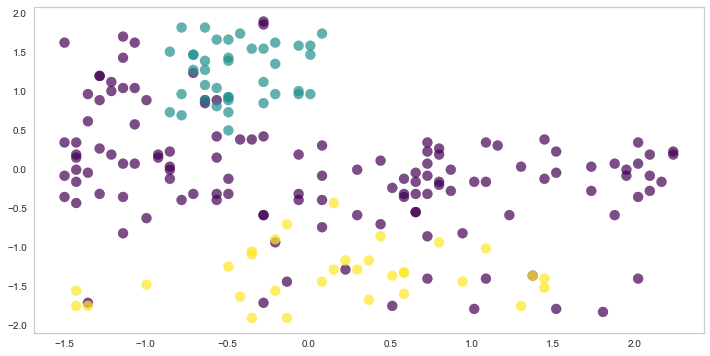

In [109]:
model1 = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)
plt.scatter(X1["Age"], X1["Spending Score (1-100)"], c = model1.labels_, cmap = "viridis", alpha =0.7, s=100)

#### Interpretation based on Age and Spending Score- x1

<AxesSubplot:>

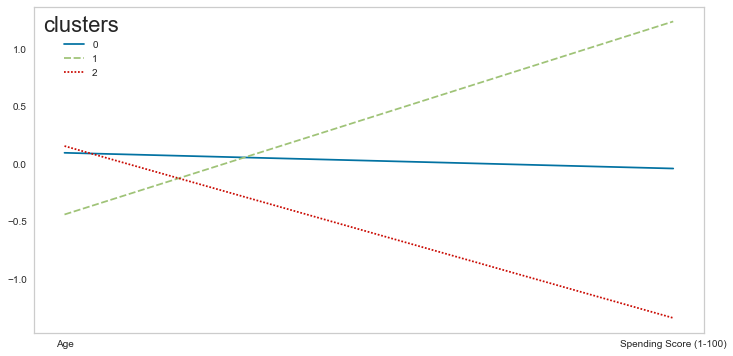

In [110]:
df["clusters"]=model1.labels_
clus_pred = df.iloc[:,[1,3,-1]].groupby("clusters").mean().T
sns.lineplot(data = clus_pred)

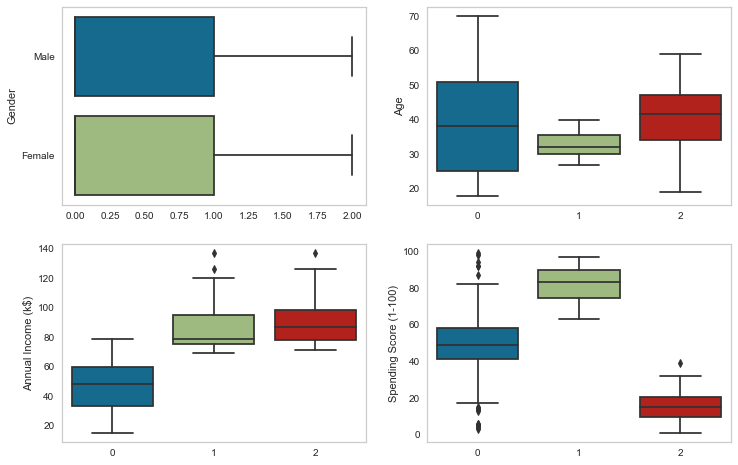

In [111]:
plt.figure(figsize=(12,8))

for i, j in enumerate(df_origin.columns):
    plt.subplot(2, 2, i+1) 
    sns.boxplot(x=model1.labels_, y=j, data=df_origin)

### Conclusion

**cluster 0** : The average age is around 38, both annual_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 32, the annual_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 42. The annual_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    

#### Annual Income and Spending Score- x2

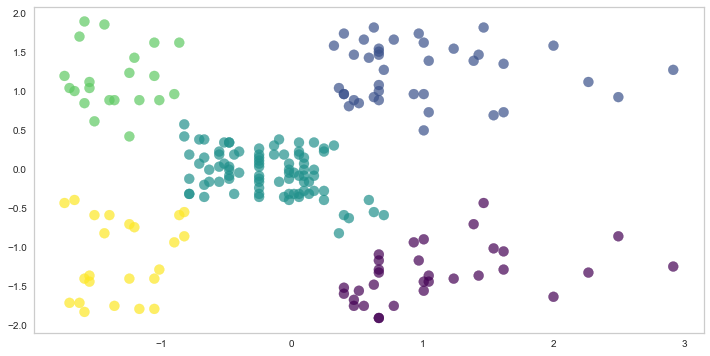

In [119]:
model2 = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
model2.fit_predict(X)
plt.scatter(X2["Annual Income (k$)"], X2["Spending Score (1-100)"], c = model2.labels_, cmap = "viridis", alpha =0.7, s=100)

#### Interpretation based on Annual Income and Spending Score- x2

<AxesSubplot:>

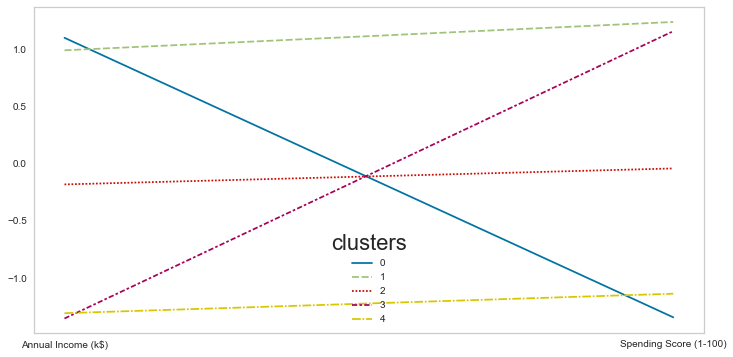

In [120]:
df["clusters"]=model2.labels_
clus_pred = df.iloc[:,[2,3,-1]].groupby("clusters").mean().T
sns.lineplot(data = clus_pred)

In [121]:
df_origin["clusters"]=model2.labels_
df_origin["clusters"]=df_origin["clusters"].map({0 : "0_medium_income_medium_spent",
                    1 : "1_high_income_high_spent",
                    2 : "2_high_income_low_spent",
                    3 : "3_low_income_high_spent",
                    4 : "5_low_income_low_spent"})
df_origin["clusters"].value_counts()

2_high_income_low_spent         85
1_high_income_high_spent        39
0_medium_income_medium_spent    32
5_low_income_low_spent          23
3_low_income_high_spent         21
Name: clusters, dtype: int64

In [122]:
df_origin.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,Male,19,15,39,5_low_income_low_spent
1,Male,21,15,81,3_low_income_high_spent
2,Female,20,16,6,5_low_income_low_spent
3,Female,23,16,77,3_low_income_high_spent
4,Female,31,17,40,5_low_income_low_spent


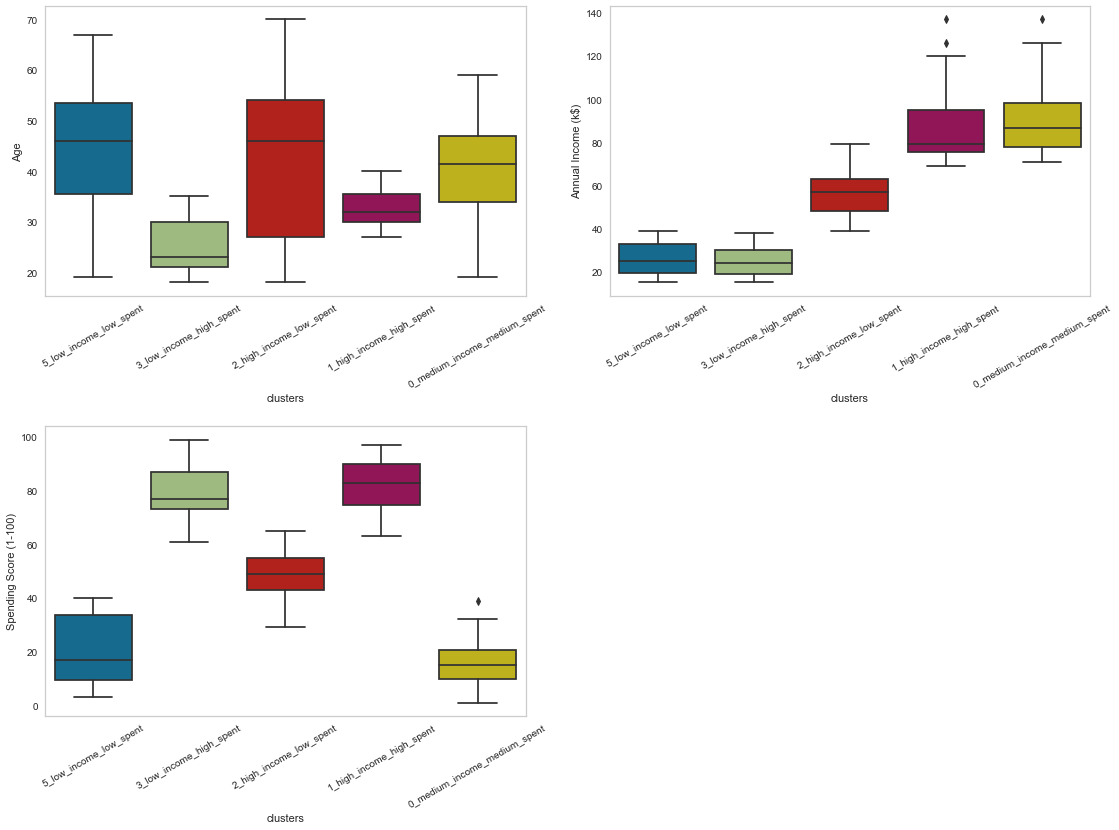

In [123]:
plt.figure(figsize=(16,12))

for i, j in enumerate(df_origin.drop(columns=["Gender","clusters"]).columns):
    plt.subplot(2, 2, i+1) 
    sns.boxplot(x="clusters", y=j, data=df_origin)
    plt.xticks(rotation=30)
    plt.tight_layout()

## Conclusion

**cluster 0** : The average age is around 40, both annual_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annual_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annual_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 45, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

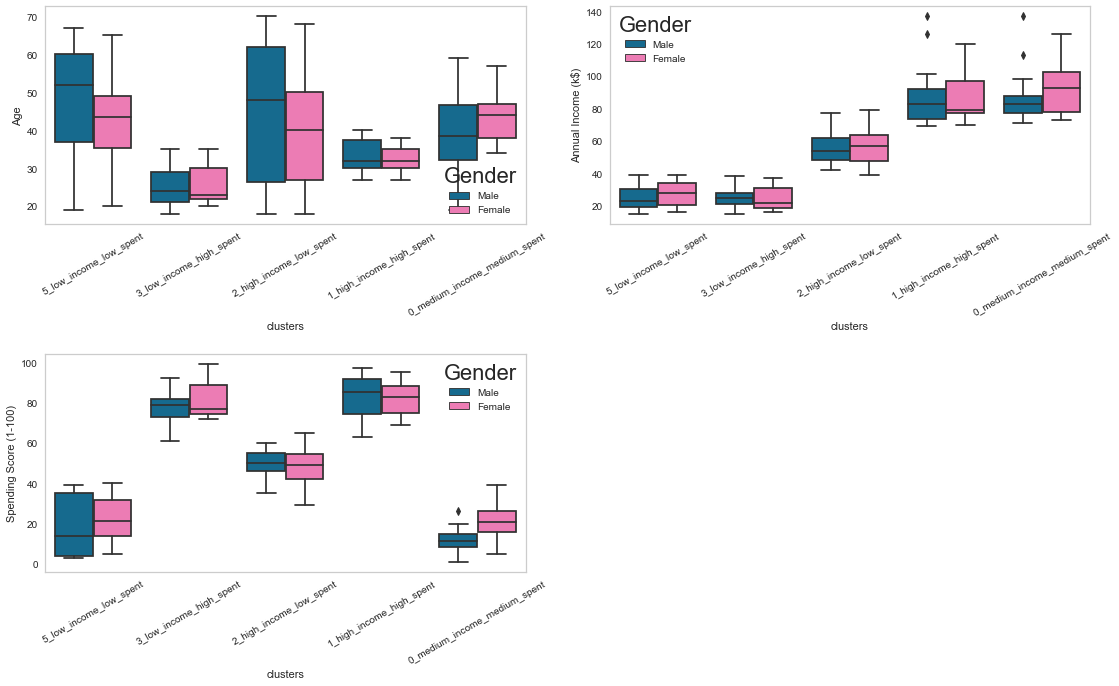

In [125]:
plt.figure(figsize=(16,10))

for i, j in enumerate(df_origin.drop(columns=["Gender","clusters"]).columns):
    plt.subplot(2, 2, i+1) 
    sns.boxplot(x="clusters", y=j, data=df_origin, hue=df_origin['Gender'], palette=['b', 'hotpink'])
    plt.xticks(rotation=30)
    plt.tight_layout()

### Female

**cluster 0** : The average age is around 40, both annual_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annual_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annual_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annual_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annual_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annual_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___